In [19]:
import pickle
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('Data/voice.csv')

x = df.iloc[:,:-1]
y = df.label
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
LRModel = pickle.load(open("Models/LR.pickle", 'rb'))
LR_pred = LRModel.predict(x_test)
DTModel = pickle.load(open("Models/DT.pickle", 'rb'))
DT_pred = DTModel.predict(x_test)
KNNModel = pickle.load(open("Models/KNN.pickle", 'rb'))
KNN_pred = KNNModel.predict(x_test)
SVMModel = pickle.load(open("Models/SVM.pickle", 'rb'))
SVM_pred = SVMModel.predict(x_test)
# ANNModel = torch.load("Models/ANN.pth")

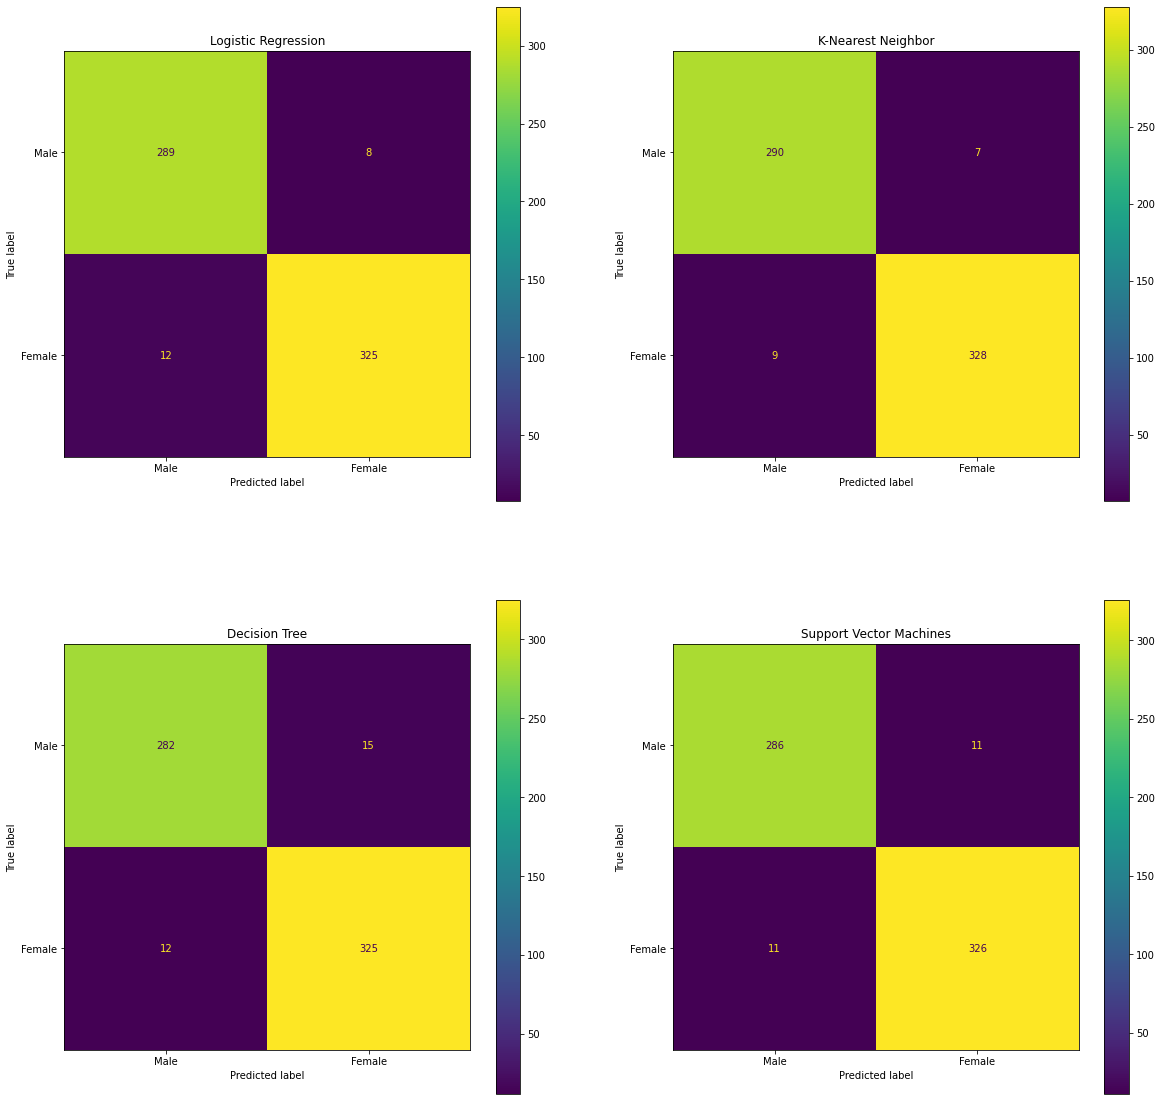

In [31]:
cLR = confusion_matrix(y_test, LR_pred)
cpLR = cp = ConfusionMatrixDisplay(cLR, display_labels=["Male", "Female"])

cDT = confusion_matrix(y_test, DT_pred)
cpDT = cp = ConfusionMatrixDisplay(cDT, display_labels=["Male", "Female"])

cKNN = confusion_matrix(y_test, KNN_pred)
cpKNN = cp = ConfusionMatrixDisplay(cKNN, display_labels=["Male", "Female"])

cSVM = confusion_matrix(y_test, SVM_pred)
cpSVM = cp = ConfusionMatrixDisplay(cSVM, display_labels=["Male", "Female"])

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
ax[0, 0].title.set_text('Logistic Regression')
ax[1, 0].title.set_text('Decision Tree')
ax[0, 1].title.set_text('K-Nearest Neighbor')
ax[1, 1].title.set_text('Support Vector Machines')
cpLR.plot(ax = ax[0, 0])
cpDT.plot(ax = ax[0, 1])
cpKNN.plot(ax = ax[1, 0])
cpSVM.plot(ax = ax[1, 1])